# Operating Point Simulation Example

In this example, we run an **OP** simulation and read its operating point into Python memory.


Voltage Node Operating Points:
      V(Vf1)         V(Vd)
0   0.536006  7.777778e-09
1   0.503271  2.840243e-08
2   0.470265  1.037183e-07
3   0.437010  3.787525e-07
4   0.403529  1.383106e-06
5   0.369841  5.050745e-06
6   0.335965  1.844401e-05
7   0.301916  6.735268e-05
8   0.268337  2.459537e-04
9   0.235495  8.981463e-04
10  0.202397  3.279622e-03
11  0.169081  1.197394e-02
12  0.135622  4.369393e-02
13  0.102238  1.591467e-01
14  0.069632  5.761405e-01
15  0.039905  2.078593e+00
16  0.017928  7.782754e+00

Voltage nodes: ['Vf1', 'Vd']
Circuit elements: {'I1': 1.0, 'D1': 'X', 'J1': 'UJ3N065080', 'I3': '{S*1e8}'}
	2 port elements: ['I1', 'D1', 'I3']
	Transistors: ['J1']


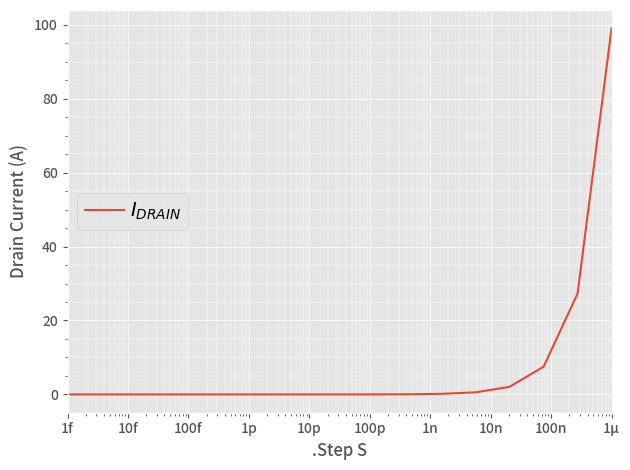

In [1]:
from PyQSPICE import clsQSPICE as pqs

import os
import math
import cmath
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

################
run = pqs("op")

run.InitPlot()

run.qsch2cir()
run.cir2qraw()
run.setNline(16)

# Extracting "nodes" and "elements" from ".cir" file...complex elements are not implemented yet!
expr = run.parseCir()

run.InitPlot()

df = run.LoadQRAW(expr)
#print(f"Expression of all V&I from QSPICE: {expr}")

print(f"Voltage Node Operating Points:\n{df.loc[:,list(map(lambda x: "V(" + x + ")",run.node))]}\n")

print(f"Voltage nodes: {run.node}")
print(f"Circuit elements: {run.elem}")
print(f"\t2 port elements: {run.ele2}")
print(f"\tTransistors: {run.eleT}")

################

run.InitPlot()
plt.close('all')

fig, ax = plt.subplots(tight_layout=True)

df.plot(ax=ax, x=run.sim['Xlbl'],  y="Id(J1)", label=r"$I_{DRAIN}$")

run.PrepFreqGainPlot(ax, f'.Step {run.sim['Xlbl']}', 'Drain Current (A)', [run.sim['Xmin'],run.sim['Xmax']])

plt.legend(ncol=1, loc="center left",fancybox=True)


run.tstime(['png'])
plt.savefig(run.path['png'], format='png', bbox_inches='tight')
plt.show()
plt.close('all')
